# Hierarchical / K-Means Clustering using Cars93 Dataset

# Read Dataset

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import pandas as pd
A = pd.read_csv("C:/Dataset/Dataset/Cars93.csv")

In [3]:
A.head(3)

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90


In [4]:
cat = []
con = []
for i in A.columns:
    if(A[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)
                
# Missing Data Treatment
    
    for i in con:
        x = A[i].mean()
        A[i]=A[i].fillna(x)

    for i in cat:
        x = A[i].mode()[0]
        A[i]=A[i].fillna(x)
        

In [5]:
X = A[["Price","MPG.city"]]

In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xnew = pd.DataFrame(ss.fit_transform(X),columns=X.columns)

In [7]:
from Functions import outliers

In [8]:
ol = outliers(Xnew)

In [9]:
Xnew = Xnew.drop(index=ol,axis=1)

In [10]:
Xnew.index = range(0,Xnew.shape[0])

In [11]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=3)
model = agc.fit(Xnew)

In [12]:
Xnew['Cluster'] = model.labels_

In [13]:
Xnew

,Price,MPG.city,Cluster
0,-0.375720,0.471312,0
1,1.497844,-0.781032,2
2,0.998227,-0.423219,1
3,1.893374,-0.602126,2
4,1.091905,-0.065407,1
...,...,...,...
85,0.019810,-0.959938,1
86,0.051036,-0.244313,1
87,0.394523,-0.781032,1
88,0.332071,-0.244313,1


Text(0, 0.5, 'Mileage')

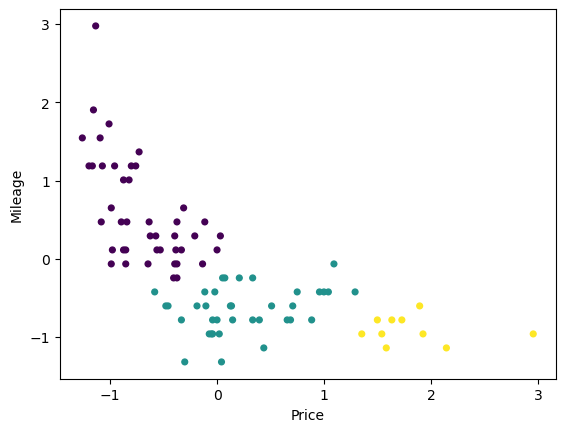

In [14]:
import matplotlib.pyplot as plt
plt.scatter(Xnew.Price,Xnew['MPG.city'],s=17,c=model.labels_)
plt.xlabel("Price")
plt.ylabel("Mileage")

# K-Means Clustering using Cars93 Dataset

# Preview of Dataset

In [15]:
A.head(3)

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90


In [16]:
Q = A[["Price","MPG.highway"]]

In [17]:
cat = []
con = []
for i in A.columns:
    if(A[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)
                
# Missing Data Treatment
    
    for i in con:
        x = A[i].mean()
        A[i]=A[i].fillna(x)

    for i in cat:
        x = A[i].mode()[0]
        A[i]=A[i].fillna(x)
        

In [38]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xnew1 = pd.DataFrame(ss.fit_transform(Q),columns=Q.columns)

In [19]:
from Functions import outliers

In [20]:
ol = outliers(Xnew1)

In [22]:
Xnew1 = Xnew1.drop(index=ol,axis=1)
Xnew1.index = range(0,Xnew1.shape[0])

# K-Means Clustering

In [23]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
model = km.fit(Xnew1)
model.labels_

array([0, 1, 1, 1, 1, 0, 0, 3, 1, 1, 1, 2, 2, 0, 0, 3, 3, 3, 1, 0, 0, 1,
       2, 0, 0, 3, 0, 3, 2, 0, 2, 0, 0, 0, 0, 3, 0, 3, 2, 0, 0, 2, 0, 2,
       0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 1, 1, 0, 0, 2, 3, 2, 0, 3, 3, 0, 0,
       3, 0, 0, 2, 0, 0, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 0, 3, 2, 3, 0, 3,
       0, 1])

In [24]:
Xnew1["Cluster"] = model.labels_

In [25]:
Xnew1["Model"] = A.Model

In [26]:
Xnew1["Make"] = A.Make

In [27]:
Xnew1

,Price,MPG.highway,Cluster,Model,Make
0,-0.375720,0.360925,0,Integra,Acura Integra
1,1.497844,-0.770514,1,Legend,Acura Legend
2,0.998227,-0.581941,1,90,Audi 90
3,1.893374,-0.581941,1,100,Audi 100
4,1.091905,0.172352,1,535i,BMW 535i
...,...,...,...,...,...
85,0.019810,-1.524806,3,Camry,Toyota Camry
86,0.051036,0.172352,0,Previa,Toyota Previa
87,0.394523,-0.770514,3,Fox,Volkswagen Fox
88,0.332071,-0.204794,0,Eurovan,Volkswagen Eurovan


# Taking input from user

In [29]:
I = input("Enter your Favourite Car : ")

Enter your Favourite Car : Toyota Camry


In [30]:
Cluster_no = Xnew1[Xnew1.Make == I].Cluster.values[0]

In [31]:
Cluster_no

3

In [32]:
L = list(Xnew1[Xnew1.Cluster == Cluster_no]["Make"].values)

In [33]:
L

['Buick Roadmaster',
 'Chevrolet Lumina_APV',
 'Chevrolet Astro',
 'Chevrolet Caprice',
 'Dodge Caravan',
 'Dodge Stealth',
 'Ford Aerostar',
 'Ford Crown_Victoria',
 'Mazda Protege',
 'Mercury Capri',
 'Mitsubishi Diamante',
 'Nissan Sentra',
 'Nissan Maxima',
 'Toyota Tercel',
 'Toyota Camry',
 'Volkswagen Fox']

In [34]:
L.remove(I)

In [35]:
L

['Buick Roadmaster',
 'Chevrolet Lumina_APV',
 'Chevrolet Astro',
 'Chevrolet Caprice',
 'Dodge Caravan',
 'Dodge Stealth',
 'Ford Aerostar',
 'Ford Crown_Victoria',
 'Mazda Protege',
 'Mercury Capri',
 'Mitsubishi Diamante',
 'Nissan Sentra',
 'Nissan Maxima',
 'Toyota Tercel',
 'Volkswagen Fox']

In [36]:
print("You can also check from recomended cars  : \n",L)

You can also check from recomended cars  : 
 ['Buick Roadmaster', 'Chevrolet Lumina_APV', 'Chevrolet Astro', 'Chevrolet Caprice', 'Dodge Caravan', 'Dodge Stealth', 'Ford Aerostar', 'Ford Crown_Victoria', 'Mazda Protege', 'Mercury Capri', 'Mitsubishi Diamante', 'Nissan Sentra', 'Nissan Maxima', 'Toyota Tercel', 'Volkswagen Fox']
